In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
train0 = pd.read_csv('train_HK6lq50.csv')
test0 = pd.read_csv('test_2nAIblo.csv')

In [3]:
train0.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1


In [4]:
train0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73147 entries, 0 to 73146
Data columns (total 16 columns):
id                           73147 non-null object
program_id                   73147 non-null object
program_type                 73147 non-null object
program_duration             73147 non-null int64
test_id                      73147 non-null int64
test_type                    73147 non-null object
difficulty_level             73147 non-null object
trainee_id                   73147 non-null int64
gender                       73147 non-null object
education                    73147 non-null object
city_tier                    73147 non-null int64
age                          45418 non-null float64
total_programs_enrolled      73147 non-null int64
is_handicapped               73147 non-null object
trainee_engagement_rating    73070 non-null float64
is_pass                      73147 non-null int64
dtypes: float64(2), int64(6), object(8)
memory usage: 8.9+ MB


In [5]:
test0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31349 entries, 0 to 31348
Data columns (total 15 columns):
id                           31349 non-null object
program_id                   31349 non-null object
program_type                 31349 non-null object
program_duration             31349 non-null int64
test_id                      31349 non-null int64
test_type                    31349 non-null object
difficulty_level             31349 non-null object
trainee_id                   31349 non-null int64
gender                       31349 non-null object
education                    31349 non-null object
city_tier                    31349 non-null int64
age                          19558 non-null float64
total_programs_enrolled      31349 non-null int64
is_handicapped               31349 non-null object
trainee_engagement_rating    31318 non-null float64
dtypes: float64(2), int64(5), object(8)
memory usage: 3.6+ MB


In [6]:
train0.describe()

,program_duration,test_id,trainee_id,city_tier,age,total_programs_enrolled,trainee_engagement_rating,is_pass
count,73147.000000,73147.000000,73147.000000,73147.000000,45418.000000,73147.000000,73070.000000,73147.000000
mean,128.208676,91.079306,9843.079620,2.246845,36.494033,2.583934,2.395634,0.695408
std,6.889679,51.239048,5703.556093,1.011587,9.041119,1.240816,1.325288,0.460238
min,117.000000,0.000000,1.000000,1.000000,17.000000,1.000000,1.000000,0.000000
25%,121.000000,45.000000,5040.000000,1.000000,28.000000,2.000000,1.000000,0.000000
50%,131.000000,90.000000,9641.000000,2.000000,39.000000,2.000000,2.000000,1.000000
75%,134.000000,135.000000,14552.000000,3.000000,45.000000,3.000000,4.000000,1.000000
max,136.000000,187.000000,20098.000000,4.000000,63.000000,14.000000,5.000000,1.000000


In [7]:
train0[['program_id','is_pass']].groupby(['program_id'],as_index=False).mean().sort_values(by='is_pass',ascending = False)

,program_id,is_pass
12,X_1,0.839140
14,X_3,0.801660
13,X_2,0.789406
15,Y_1,0.787049
18,Y_4,0.776203
16,Y_2,0.747937
5,T_4,0.742279
17,Y_3,0.742111
3,T_2,0.740506
4,T_3,0.734315


In [8]:
train0[['program_type','is_pass']].groupby(['program_type'],as_index=False).mean().sort_values(by='is_pass',ascending = False)

,program_type,is_pass
4,X,0.814002
5,Y,0.764096
6,Z,0.720772
1,T,0.698721
2,U,0.625240
3,V,0.585873
0,S,0.546003


In [9]:
train0[['test_type','is_pass']].groupby(['test_type'],as_index=False).mean().sort_values(by='is_pass',ascending = False)

,test_type,is_pass
1,online,0.779996
0,offline,0.637898


In [10]:
train0[['difficulty_level','is_pass']].groupby(['difficulty_level'],as_index=False).mean().sort_values(by='is_pass',ascending = False)

,difficulty_level,is_pass
0,easy,0.737189
1,hard,0.667573
2,intermediate,0.654877
3,vary hard,0.430562


In [11]:
train0[['gender','is_pass']].groupby(['gender'],as_index=False).mean().sort_values(by='is_pass',ascending = False)

,gender,is_pass
1,M,0.704172
0,F,0.685374


In [12]:
train0[['education','is_pass']].groupby(['education'],as_index=False).mean().sort_values(by='is_pass',ascending = False)

,education,is_pass
2,Masters,0.833984
0,Bachelors,0.742509
1,High School Diploma,0.714789
3,Matriculation,0.648592
4,No Qualification,0.583658


In [13]:
train0[['city_tier','is_pass']].groupby(['city_tier'],as_index=False).mean().sort_values(by='is_pass',ascending = False)

,city_tier,is_pass
0,1,0.732702
1,2,0.696994
2,3,0.683879
3,4,0.617070


In [14]:
train0[['trainee_engagement_rating','is_pass']].groupby(['trainee_engagement_rating'],as_index=False).mean().sort_values(by='is_pass',ascending = False)

,trainee_engagement_rating,is_pass
4,5.0,0.862422
3,4.0,0.804393
2,3.0,0.737904
1,2.0,0.685157
0,1.0,0.591522


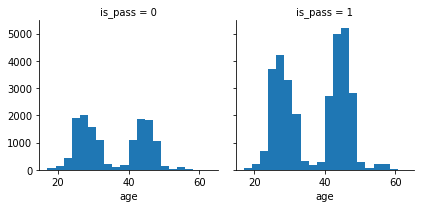

In [15]:
g = sns.FacetGrid(train0,col='is_pass')
g.map(plt.hist,'age',bins=20)

In [16]:
train0.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1


/usr/local/lib/python3.4/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.4/dist-packages/seaborn/axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


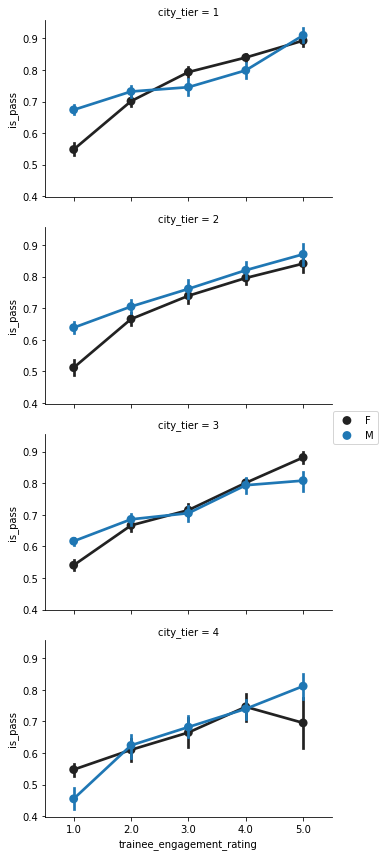

In [17]:
grid = sns.FacetGrid(train0,row ='city_tier',size = 3,aspect = 1.6)
grid.map(sns.pointplot, 'trainee_engagement_rating','is_pass','gender')
grid.add_legend()

In [18]:
train0.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1


In [19]:
train2 = train0.drop(['id','test_id','trainee_id','is_handicapped','total_programs_enrolled'],axis =1)

In [20]:
train2 = train2.drop(['program_duration'],axis =1)

In [21]:
test2 = test0.drop(['id','test_id','trainee_id','is_handicapped','total_programs_enrolled','program_duration'],axis =1)

In [22]:
train2.head()

,program_id,program_type,test_type,difficulty_level,gender,education,city_tier,age,trainee_engagement_rating,is_pass
0,Y_1,Y,offline,intermediate,M,Matriculation,3,24.0,1.0,0
1,T_1,T,offline,easy,F,High School Diploma,4,26.0,3.0,1
2,Z_2,Z,online,easy,M,Matriculation,1,40.0,2.0,1
3,T_2,T,offline,easy,F,Matriculation,3,NaN,1.0,1
4,V_3,V,offline,intermediate,F,High School Diploma,1,42.0,4.0,1


In [23]:
combine = [train2, test2]
for dataset in combine:
    dataset['gender'] = dataset['gender'].map( {'F': 1, 'M': 0} ).astype(int)

In [24]:
for dataset in combine:
    dataset['education'] = dataset['education'].map( {'No Qualification':0, 'Matriculation': 1, 'High School Diploma': 2,'Bachelors':3,'Masters':4 } ).astype(int)
    

In [25]:
train2.head().nunique()

program_id                   5
program_type                 4
test_type                    2
difficulty_level             2
gender                       2
education                    2
city_tier                    3
age                          4
trainee_engagement_rating    4
is_pass                      2
dtype: int64

In [26]:
from sklearn.preprocessing import LabelEncoder

number = LabelEncoder()
train2['program_id'] = number.fit_transform(y = train2['program_id'].astype('str'))
test2['program_id'] = number.fit_transform(y = test2['program_id'].astype('str'))

In [27]:
train2['difficulty_level'] = number.fit_transform(y = train2['difficulty_level'].astype('str'))
test2['difficulty_level'] = number.fit_transform(y = test2['difficulty_level'].astype('str'))

In [28]:
train2['test_type'] = number.fit_transform(y = train2['test_type'].astype('str'))
test2['test_type'] = number.fit_transform(y = test2['test_type'].astype('str'))

train2.head()

,program_id,program_type,test_type,difficulty_level,gender,education,city_tier,age,trainee_engagement_rating,is_pass
0,15,Y,0,2,0,1,3,24.0,1.0,0
1,2,T,0,0,1,2,4,26.0,3.0,1
2,20,Z,1,0,0,1,1,40.0,2.0,1
3,3,T,0,0,1,1,3,NaN,1.0,1
4,10,V,0,2,1,2,1,42.0,4.0,1


In [29]:
train2['program_type'] = number.fit_transform(y = train2['program_type'].astype('str'))
test2['program_type'] = number.fit_transform(y = test2['program_type'].astype('str'))
train2.head()

,program_id,program_type,test_type,difficulty_level,gender,education,city_tier,age,trainee_engagement_rating,is_pass
0,15,5,0,2,0,1,3,24.0,1.0,0
1,2,1,0,0,1,2,4,26.0,3.0,1
2,20,6,1,0,0,1,1,40.0,2.0,1
3,3,1,0,0,1,1,3,NaN,1.0,1
4,10,3,0,2,1,2,1,42.0,4.0,1


In [30]:
train2['trainee_engagement_rating'] = number.fit_transform(y = train2['trainee_engagement_rating'].astype('float'))
test2['trainee_engagement_rating'] = number.fit_transform(y = test2['trainee_engagement_rating'].astype('float'))
train2.head()

,program_id,program_type,test_type,difficulty_level,gender,education,city_tier,age,trainee_engagement_rating,is_pass
0,15,5,0,2,0,1,3,24.0,0,0
1,2,1,0,0,1,2,4,26.0,2,1
2,20,6,1,0,0,1,1,40.0,1,1
3,3,1,0,0,1,1,3,NaN,0,1
4,10,3,0,2,1,2,1,42.0,3,1


In [31]:
train2.dropna(axis=0, how='any',inplace = True)

In [32]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45418 entries, 0 to 73146
Data columns (total 10 columns):
program_id                   45418 non-null int64
program_type                 45418 non-null int64
test_type                    45418 non-null int64
difficulty_level             45418 non-null int64
gender                       45418 non-null int64
education                    45418 non-null int64
city_tier                    45418 non-null int64
age                          45418 non-null float64
trainee_engagement_rating    45418 non-null int64
is_pass                      45418 non-null int64
dtypes: float64(1), int64(9)
memory usage: 3.8 MB


In [33]:
train2.head()

,program_id,program_type,test_type,difficulty_level,gender,education,city_tier,age,trainee_engagement_rating,is_pass
0,15,5,0,2,0,1,3,24.0,0,0
1,2,1,0,0,1,2,4,26.0,2,1
2,20,6,1,0,0,1,1,40.0,1,1
4,10,3,0,2,1,2,1,42.0,3,1
5,4,1,0,2,1,2,1,29.0,1,0


In [34]:
test2.dropna(axis=0, how='any',inplace = True)

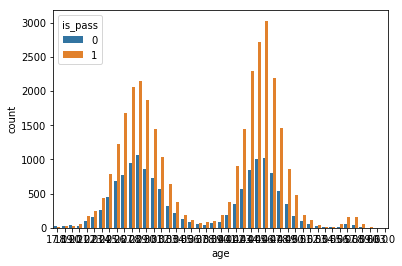

In [66]:
ax = sns.countplot(x="age", data=train2, hue = 'is_pass')

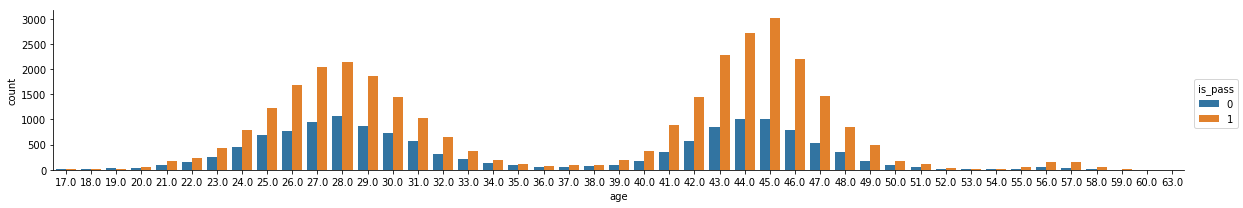

In [70]:
g = sns.factorplot(x="age",data=train2, kind="count",size=3, aspect=5.5, hue = 'is_pass' );

In [60]:
train2['age'].value_counts(sort = True)

45.0    4043
44.0    3723
28.0    3211
43.0    3136
27.0    3005
46.0    2990
29.0    2730
26.0    2445
30.0    2169
42.0    2023
47.0    1999
25.0    1904
31.0    1602
41.0    1243
24.0    1240
48.0    1207
32.0     969
23.0     699
49.0     651
33.0     595
40.0     562
22.0     400
34.0     318
39.0     277
50.0     276
21.0     269
56.0     213
35.0     210
57.0     196
38.0     175
51.0     166
36.0     138
37.0     136
20.0      89
55.0      70
58.0      64
52.0      61
19.0      60
18.0      45
17.0      35
53.0      30
54.0      25
59.0      16
63.0       2
60.0       1
Name: age, dtype: int64

In [94]:
#we see that there are 2 major distinctions based on the number of people into data science

#TODO
#1. calculate an age score : prob of is_pass, given the age. ie (is_pass/total) for a particular age

#for a in train2:
 #   train2['agescore'] = 
    

In [72]:
#test-train split

from sklearn.model_selection import train_test_split
columns = train2.columns.tolist()


In [96]:
y = train2['is_pass']
X_train, X_test, y_train, y_test = train_test_split(train2, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(36334, 10) (36334,)
(9084, 10) (9084,)


In [104]:
X_train1 = X_train.drop("is_pass", axis=1)
y_train1 = y_train
X_test1  = X_test.drop("is_pass", axis=1)
y_test1 = y_test
X_train1.shape, y_train1.shape, X_test1.shape

((36334, 9), (36334,), (9084, 9))

In [105]:

svc = SVC()
#Y_train = train2["is_pass"]
svc.fit(X_train1, y_train1)
Y_pred = svc.predict(X_test1)
acc_svc = round(svc.score(X_test1, y_test1) * 100, 2)
acc_svc


71.69

In [106]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train1, y_train1)
Y_pred = knn.predict(X_test1)
acc_knn = round(knn.score(X_test1, y_test1) * 100, 2)
acc_knn

70.16

In [108]:
logreg = LogisticRegression()
logreg.fit(X_train1, y_train1)
Y_pred = logreg.predict(X_test1)
acc_log = round(logreg.score(X_test1, y_test1) * 100, 2)
acc_log

69.83

In [109]:
gaussian = GaussianNB()
gaussian.fit(X_train1, y_train1)
Y_pred = gaussian.predict(X_test1)
acc_gaussian = round(gaussian.score(X_test1, y_test1) * 100, 2)
acc_gaussian

69.2

In [110]:
perceptron = Perceptron()
perceptron.fit(X_train1, y_train1)
Y_pred = perceptron.predict(X_test1)
acc_perceptron = round(perceptron.score(X_test1, y_test1) * 100, 2)
acc_perceptron

/usr/local/lib/python3.4/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


69.3

In [112]:
linear_svc = LinearSVC()
linear_svc.fit(X_train1, y_train1)
Y_pred = linear_svc.predict(X_test1)
acc_linear_svc = round(linear_svc.score(X_test1, y_test1) * 100, 2)
acc_linear_svc

69.3

In [113]:
sgd = SGDClassifier()
sgd.fit(X_train1, y_train1)
Y_pred = sgd.predict(X_test1)
acc_sgd = round(sgd.score(X_test1, y_test1) * 100, 2)
acc_sgd

/usr/local/lib/python3.4/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


51.23

In [114]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train1, y_train1)
Y_pred = decision_tree.predict(X_test1)
acc_decision_tree = round(decision_tree.score(X_test1, y_test1) * 100, 2)
acc_decision_tree

69.21

In [116]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train1, y_train1)
Y_pred = random_forest.predict(X_test1)
random_forest.score(X_test1, y_test1)
acc_random_forest = round(random_forest.score(X_test1, y_test1) * 100, 2)
acc_random_forest

71.36

In [124]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,71.69
3,Random Forest,71.36
1,KNN,70.16
2,Logistic Regression,69.83
5,Perceptron,69.30
7,Linear SVC,69.30
8,Decision Tree,69.21
4,Naive Bayes,69.20
6,Stochastic Gradient Decent,51.23


In [129]:
X_train1

,program_id,program_type,test_type,difficulty_level,gender,education,city_tier,age,trainee_engagement_rating
13538,2,1,0,0,1,1,3,42.0,1
37432,8,3,0,0,0,1,1,27.0,0
46489,21,6,1,0,1,1,1,43.0,3
8488,3,1,0,2,0,3,4,43.0,1
9872,3,1,0,2,1,1,2,42.0,1
18819,20,6,0,0,1,1,3,29.0,0
858,10,3,0,0,1,3,3,46.0,2
58736,17,5,1,0,0,2,3,45.0,3
64705,21,6,1,0,1,1,4,26.0,1
72408,19,6,0,0,1,2,2,45.0,2


In [128]:
submission = pd.DataFrame({
        "id": X_train["id"],
        "is_pass": Y_pred
    })

KeyError: 'id'